In [69]:
#Parse json
import json
import sys
import os
import braingeneers.analysis
import numpy as np
import matplotlib.pyplot as plt

In [70]:
#Read the json file
path = 'labeled_data_warren_templates/neuron_dictionary01.json'

In [71]:
#Open the file
with open(path) as f:
    data = json.load(f)


In [72]:
data['2022-12-14-e-c11400_longTrace_20221209_11_38_20_chip1400_curated_s10']

{'channels': [9, 0, 8, 5, 6, 1, 2, 7, 4, 10, 11, 3],
 'file_path': 'spikes/2022-12-14-e-c11400_long/Trace_20221209_11_38_20_chip1400_curated_s1/cluster_id_-_0.npy',
 'amplitudes': [8.557601775063409,
  8.790339914957682,
  9.112593179278903,
  8.092125786675346,
  9.506457556618585,
  9.578069056404962,
  10.00773950682746,
  8.145834594302707,
  9.506457466549344,
  9.023078187306721,
  10.365798166063097,
  8.96936951743232],
 'distances': [78.26237921249263,
  0.0,
  39.131189606246316,
  87.5,
  63.09714732061981,
  52.5,
  17.5,
  55.339859052946636,
  72.15434844830907,
  94.24038412485382,
  39.131189606246316,
  70.0],
 'key': 'uuid+experiment+str(cluster_id)',
 'uuid': '2022-12-14-e-c11400_long',
 'experiment': 'Trace_20221209_11_38_20_chip1400_curated_s1',
 'cluster_id': 0,
 'spike_times': [21031.9,
  21114.550000000003,
  44391.55,
  58507.85,
  107443.20000000001,
  107474.7,
  112329.9,
  112350.25,
  112408.35,
  119455.6,
  119620.95,
  119648.55,
  124230.45000000001,
 

In [73]:
templates = [data[x]['spike_template'] for x in data]
trains = [data[x]['spike_times'] for x in data]
label = [data[x]['kslabel'] for x in data]

In [74]:
#Check max values for 

In [75]:
print(templates[0])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004170532625056997, 0.022429764594281202, 0.022019991782873314, 0.02550618958083429, 0.027088133405521513, 0.028465056226428857, 0.0304136416866044, 0.033393511778204946, 0.0354749185583461, 0.037181155777182937, 0.03921968511944997, 0.0401651225827574, 0.040827338469436286, 0.041513845629633665, 0.03820103755067073, 0.03139089999687195, 0.021240462090077267, -0.013192857065560563, -0.0870166650456929, -0.16810993626325593, -0.1849682425812657, -0.14125486293552234, -0.10369313752767342, -0.07980708310988067, -0.05875991532484599, -0.037240911131701096, -0.022826882700353292, -0.012856729521938712, -0.0029972920015867884, 0.004456383810638887, 0.008767419839446325, 0.012838208655031588, 0.01741250949811092, 0.02188008906454031, 0.02346615131558617, 0.025245758344211354, 0.027572738911319464, 0.029452782117154318, 0.030839461102518614, 0.031241507819463644, 0.030299011503108934, 0

In [76]:
print(trains[0])

[21031.9, 21114.550000000003, 44391.55, 58507.85, 107443.20000000001, 107474.7, 112329.9, 112350.25, 112408.35, 119455.6, 119620.95, 119648.55, 124230.45000000001, 153885.9, 153899.55000000002, 188523.1, 188570.2, 201409.44999999998, 201575.05000000002, 201623.0, 212506.35, 212546.0, 226865.65, 227260.1, 238695.6, 255717.9, 267124.64999999997, 271120.60000000003, 271134.2, 271180.8, 271261.35, 271283.0, 271581.0, 271594.0, 271961.05, 272005.5, 272310.9, 272339.75, 272529.5, 282823.55, 282947.7, 290767.10000000003, 290892.95, 302988.75, 314702.85000000003, 318140.5, 332655.64999999997, 340171.3, 354703.89999999997, 354713.1, 360691.39999999997, 360735.35, 363625.80000000005, 378272.0, 378288.9, 391607.19999999995, 401425.8, 434529.45, 448812.14999999997, 450476.2, 454638.89999999997, 454651.8, 454663.95, 460583.8, 460603.5, 465513.2, 483116.30000000005, 483159.45, 499918.0, 499929.6, 536856.7000000001, 553852.35, 553865.9, 557402.75, 562343.5, 562582.1, 562753.75, 562876.7000000001, 562

In [77]:
print(label[300])

3


In [78]:
phy = braingeneers.analysis.SpikeData(trains)

In [79]:
all_isi = phy.interspike_intervals()

In [80]:
#Check max values for interspike intervals
maxim = -1
min = 1
for i in range(0, len(all_isi)):
    if maxim < np.max(all_isi[i]):
        maxim = np.max(all_isi[i])
    if min > np.min(all_isi[i]):
        min = np.min(all_isi[i])

print(maxim)
print(min)

261499.7
0.0


In [81]:
print(np.sort(all_isi[0][all_isi[0] < 100]))

[ 3.85  9.2  11.6  12.15 12.9  13.   13.55 13.6  13.65 16.9  18.7  19.7
 20.35 21.65 27.6  28.85 31.5  39.65 43.15 43.95 44.45 46.6  47.1  47.95
 58.1  80.55 82.65]


In [82]:
len(all_isi[0])

89

In [83]:
# for isi in all_isi:
#     plt.hist(isi, bins=100,density=True, alpha=0.6, color='g')
#     plt.show()

In [84]:
isi_dist = []
bad_indices = []
for idx, isi in enumerate(all_isi):
    hist, _ = np.histogram(isi[isi < 100], bins=100) #This is in miliseconds# Tal had (bin widths were set to 1/15th of the median ISI for a given unit)
    #Convert the counts to percentage
    
    hist = hist/sum(hist)
    if not np.isnan(hist).all():
        isi_dist.append(hist)
    else:
        bad_indices.append(idx)

/var/folders/8j/hhg86qg53d71xmkq8rcwcfzh0000gn/T/ipykernel_1340/3518271201.py:7: RuntimeWarning: invalid value encountered in divide
  hist = hist/sum(hist)


In [85]:
np.max(isi_dist)

1.0

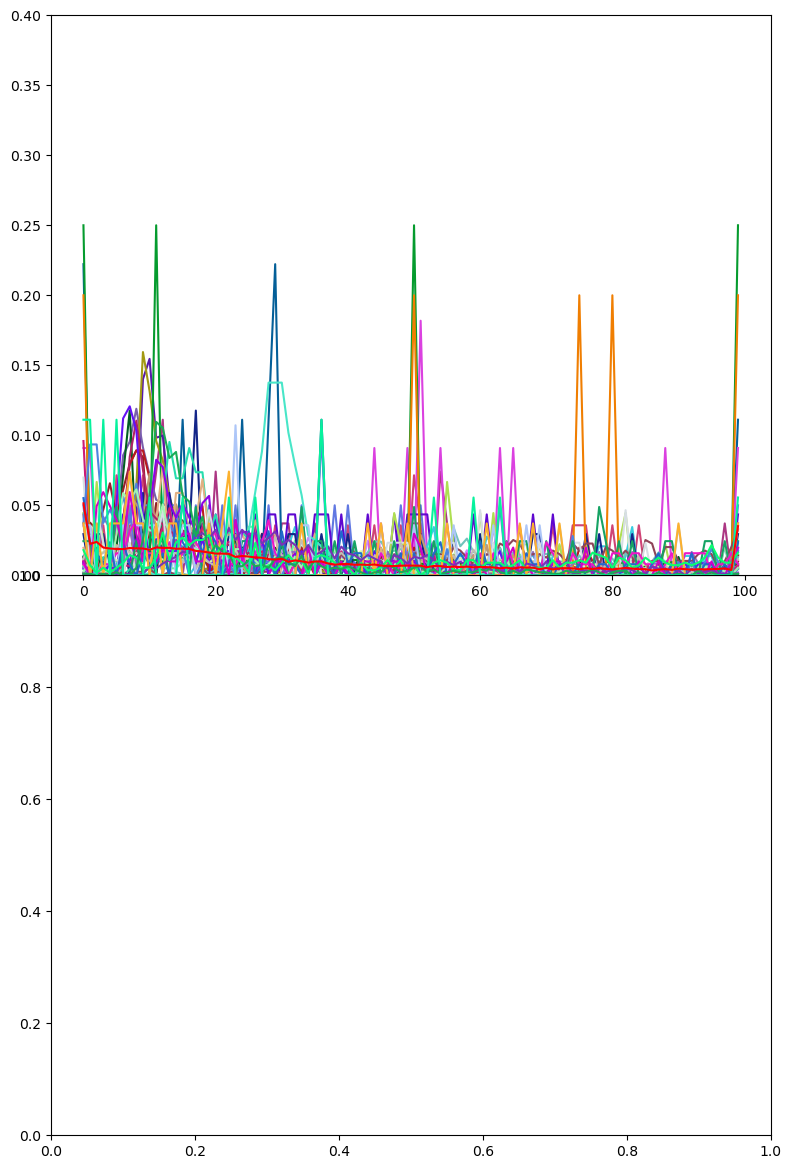

In [86]:
indices_isi = [i for i in range(0, len(isi_dist[0]))]
plt.figure(figsize=(18, 14))
panel1 = plt.axes([0.1, 0.1, 0.4, 0.4])
panel2 = plt.axes([0.1, 0.5, 0.4, 0.4])
panel2.set_ylim(0, 0.4)
#Change waveforms.shape to something more manageable
size = 50

#panel1.scatter(indices_wf, waveform[0], c='r', s=1)
for i in range(0, size):
    #print(isi_dist[i])
    #if any value is bigger than 0.25 plot it as grey
    if any(isi_dist[i] > 0.25):
        panel2.plot(indices_isi, isi_dist[i], c='grey',alpha=0)
    else:
        #Random color
        panel2.plot(indices_isi, isi_dist[i], c=np.random.rand(3,))

#Mean ISI distribution
#Remove arrays where one value is over 0.25
new_isi_dist = [x for x in isi_dist if not any(x > 0.5)]
mean_isi = np.mean(new_isi_dist, axis=0)

panel2.plot(indices_isi, mean_isi, c='r')

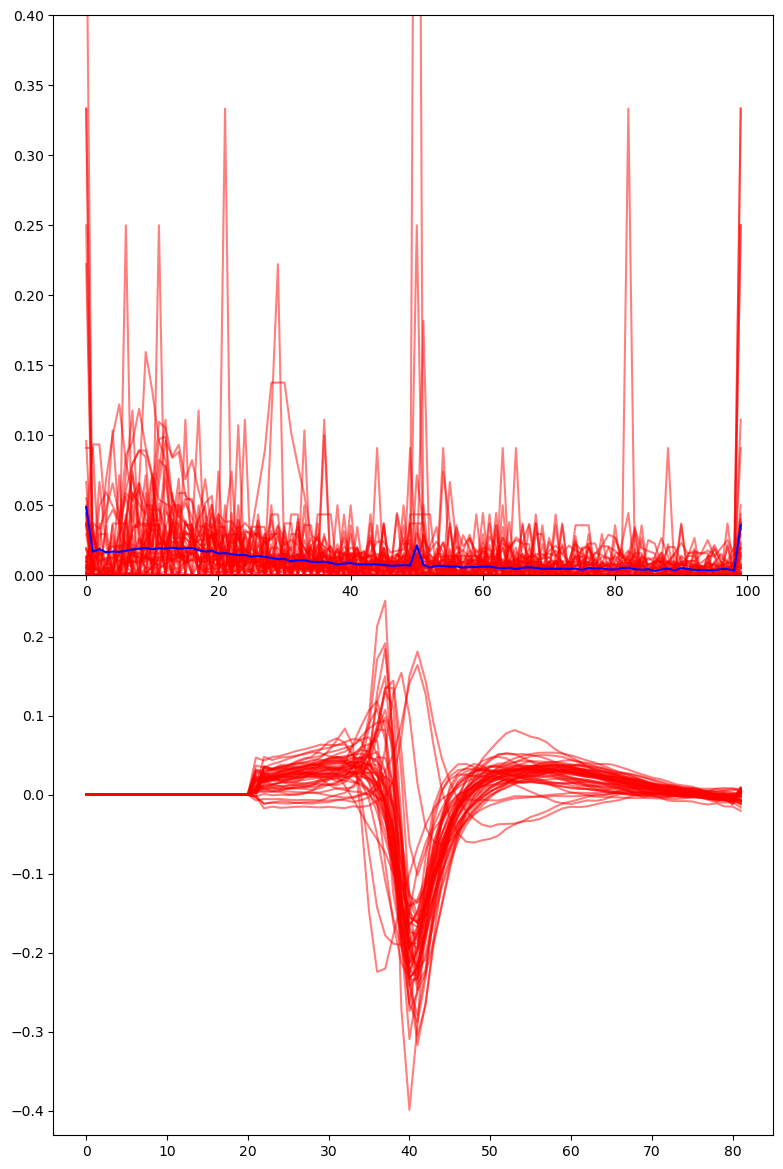

In [87]:
plt.figure(figsize=(18, 14))
panel1 = plt.axes([0.1, 0.1, 0.4, 0.4])
panel2 = plt.axes([0.1, 0.5, 0.4, 0.4])
#Only pick waveforms with label 1
label1_temp = [x for i, x in enumerate(templates) if label[i] == 1]
label1_isi = [x for i, x in enumerate(isi_dist) if label[i] == 1]
#Plot the first 50 waveforms
for i in range(0, size):
    panel1.plot(label1_temp[i], c='r', alpha=0.5)
    panel2.plot(indices_isi, label1_isi[i], c='r', alpha=0.5)
panel2.set_ylim(0, 0.4)

#plot mean isi
mean_isi = np.mean(label1_isi, axis=0)
panel2.plot(indices_isi, mean_isi, c='blue')



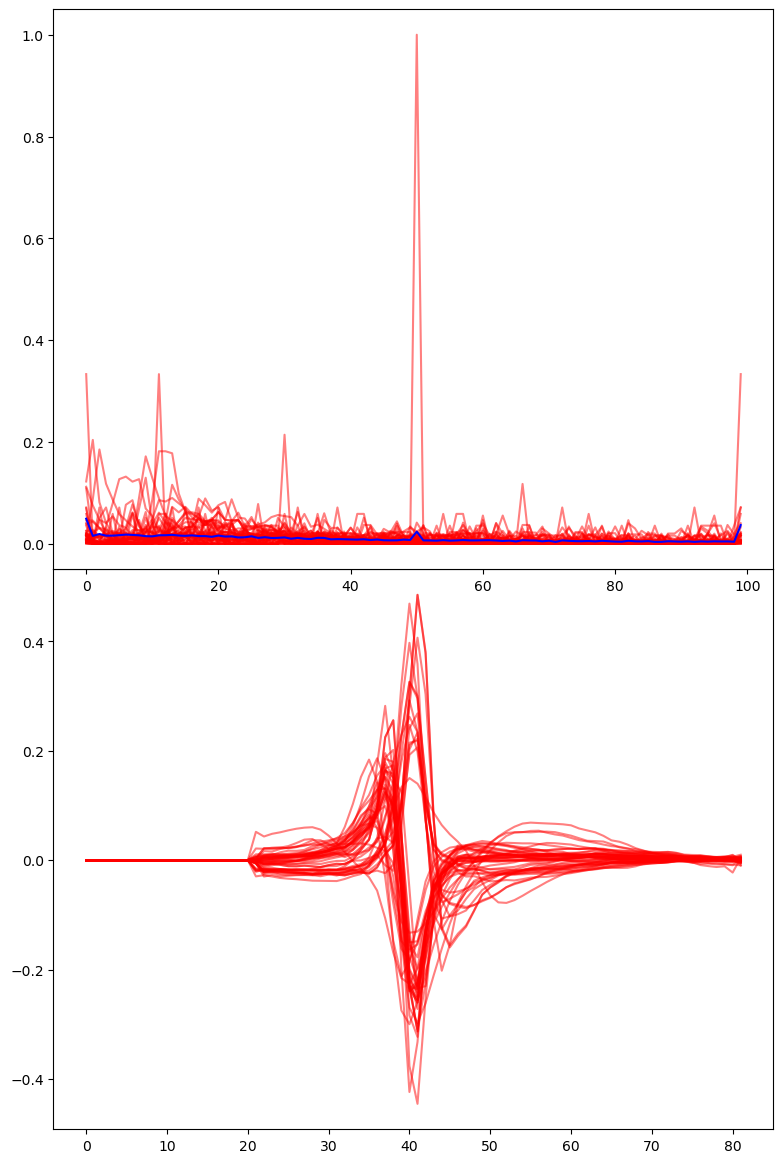

In [88]:
plt.figure(figsize=(18, 14))
panel1 = plt.axes([0.1, 0.1, 0.4, 0.4])
panel2 = plt.axes([0.1, 0.5, 0.4, 0.4])
#Only pick waveforms with label 1
label1_temp = [x for i, x in enumerate(templates) if label[i] == 2]
label1_isi = [x for i, x in enumerate(isi_dist) if label[i] == 2]
#Plot the first 50 waveforms
for i in range(0, size):
    panel1.plot(label1_temp[i], c='r', alpha=0.5)
    panel2.plot(indices_isi, label1_isi[i], c='r', alpha=0.5)

#plot mean isi
mean_isi = np.mean(label1_isi, axis=0)
panel2.plot(indices_isi, mean_isi, c='blue')


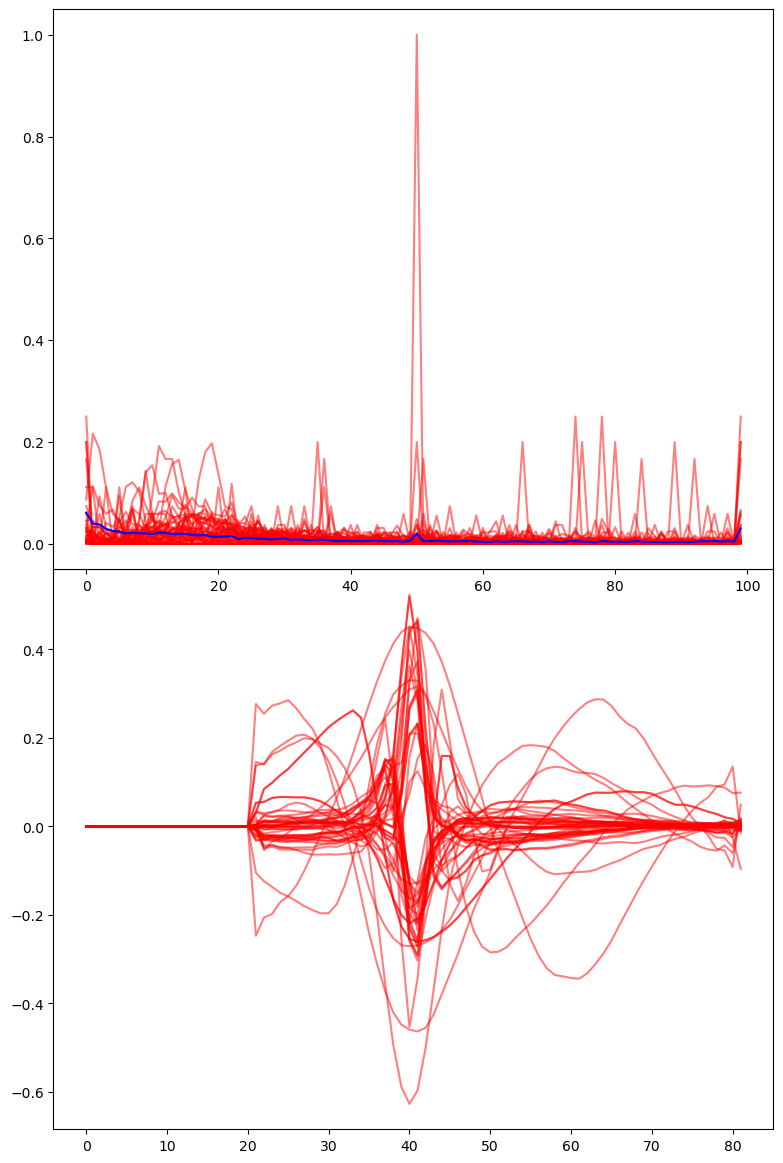

In [89]:
plt.figure(figsize=(18, 14))
panel1 = plt.axes([0.1, 0.1, 0.4, 0.4])
panel2 = plt.axes([0.1, 0.5, 0.4, 0.4])
#Only pick waveforms with label 1
label1_temp = [x for i, x in enumerate(templates) if label[i] == 3]
label1_isi = [x for i, x in enumerate(isi_dist) if label[i] == 3]
#Plot the first 50 waveforms
for i in range(0, size):
    panel1.plot(label1_temp[i], c='r', alpha=0.5)
    panel2.plot(indices_isi, label1_isi[i], c='r', alpha=0.5)
mean_isi = np.mean(label1_isi, axis=0)
panel2.plot(indices_isi, mean_isi, c='blue')

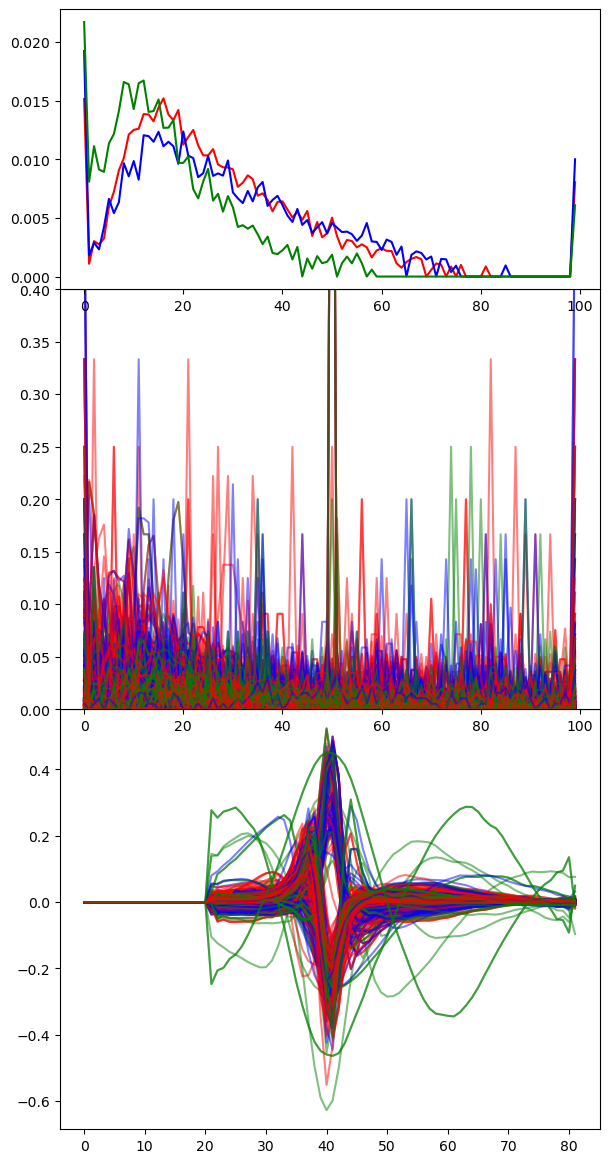

In [90]:
plt.figure(figsize=(18, 14))
panel1 = plt.axes([0.1, 0.1, 0.3, 0.3])
panel2 = plt.axes([0.1, 0.4, 0.3, 0.3])
panel3 = plt.axes([0.1, 0.7, 0.3, 0.2])
#Only pick waveforms with label 1
#Plot the first 50 waveforms
size = 500
colorList = ['grey','r', 'b', 'g', 'y', 'm', 'c', 'k']
panel2.set_ylim(0, 0.4)
for i in range(0, size):
    color = colorList[label[i]]
    panel1.plot(templates[i], c=color, alpha=0.5)
    panel2.plot(indices_isi, isi_dist[i], c=color, alpha=0.5)

#Plot the mean for the different labels
for i in range(1, 4):
    label1_temp = [x for j, x in enumerate(templates) if label[j] == i]
    label1_isi = [x for j, x in enumerate(isi_dist) if label[j] == i]
    mean_isi = np.median(label1_isi, axis=0)
    panel3.plot(indices_isi, mean_isi, c=colorList[i])



50


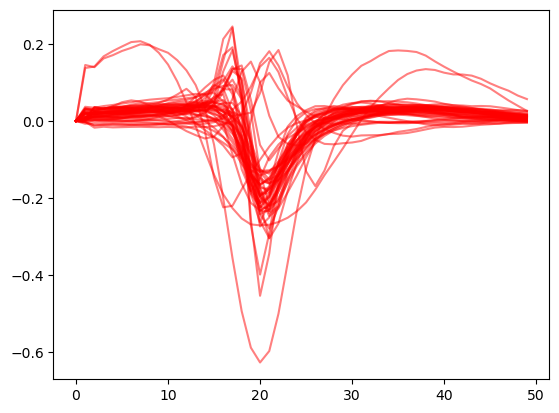

In [91]:
#templates
len(templates[0])
#Trim the templates
templates_new = [x[20:] for x in templates]
templates_new = [x[:-12] for x in templates_new]
print(len(templates_new[0]))
#Plot the first 50 waveforms
for i in range(0, 50):
    plt.plot(templates_new[i], c='r', alpha=0.5)

In [92]:
len(isi_dist[0])

100

In [101]:
len(label)

1156

In [99]:
len(templates_new)

1156

In [98]:
len(isi_dist)

1156

In [97]:
#Drop the bad indices
templates_new = np.delete(templates_new, bad_indices, axis=0)
label = np.delete(label, bad_indices)

In [102]:
#save the data as npy files
np.save('templates_50.npy', templates_new)
np.save('isi_dist_100.npy', isi_dist)
np.save('label_int.npy', label)